- [1. Import Packages](#1)
- [2. Assembling Dataset](#2)
- [3. Model Training](#3)
- [4. Evaluation](#4)

## 1. Import Packages and Functions <a id='1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


def mae(predictions, targets):
    return np.abs(predictions - targets).mean()


def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


def theil_u_statistic(predictions, targets):
    numerator = np.sqrt(((predictions - targets) ** 2).mean())
    denominator = np.sqrt((predictions ** 2).mean()) + np.sqrt((targets ** 2).mean())
    return numerator / denominator


## 2. Assembling Dataset <a id='2'></a>

In [4]:
all_features_path = '/Users/liqingyang/Documents/GitHub/variance_prediction/data/cleaned_data/btc_1d_engineered_selected_features.csv'
all_features = pd.read_csv(all_features_path)
all_features['7_day_pre_1'] = all_features['7_day_vol'].shift(1)
all_features['7_day_pre_2'] = all_features['7_day_vol'].shift(2)
all_features['7_day_pre_3'] = all_features['7_day_vol'].shift(3)
all_features['close_pre_1'] = all_features['close'].shift(1)
all_features['close_pre_2'] = all_features['close'].shift(2)
all_features['close_pre_3'] = all_features['close'].shift(3)
all_features = all_features.dropna()

In [5]:
np.random.seed(0)
features = all_features[['close', 'close_pre_1', 'close_pre_2', 'close_pre_3', 'Volume BTC', 'Volume USD', '5_day_vol',
                        'rsi_14_over_30', 'rsi_7_over_14', 'vol_ratio_30_over_150', '7_day_vol', 
                        '7_day_pre_1', '7_day_pre_2', '7_day_pre_3']]
target = all_features['target'].to_numpy().reshape(-1, 1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, shuffle=False, random_state=0)

### 3. Model Training <a id='3'></a>

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"Coefficient: {lr.coef_[0][0]}")
print(f"Intercept: {lr.intercept_[0]}")

y_pred = lr.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Coefficient: -0.004398859583756082
Intercept: 0.03381933966380537
Mean Squared Error: 3.2427285023062104e-05
R-squared: 0.8351657548755249


In [11]:
pwd

'/Users/liqingyang/Documents/GitHub/variance_prediction/models'

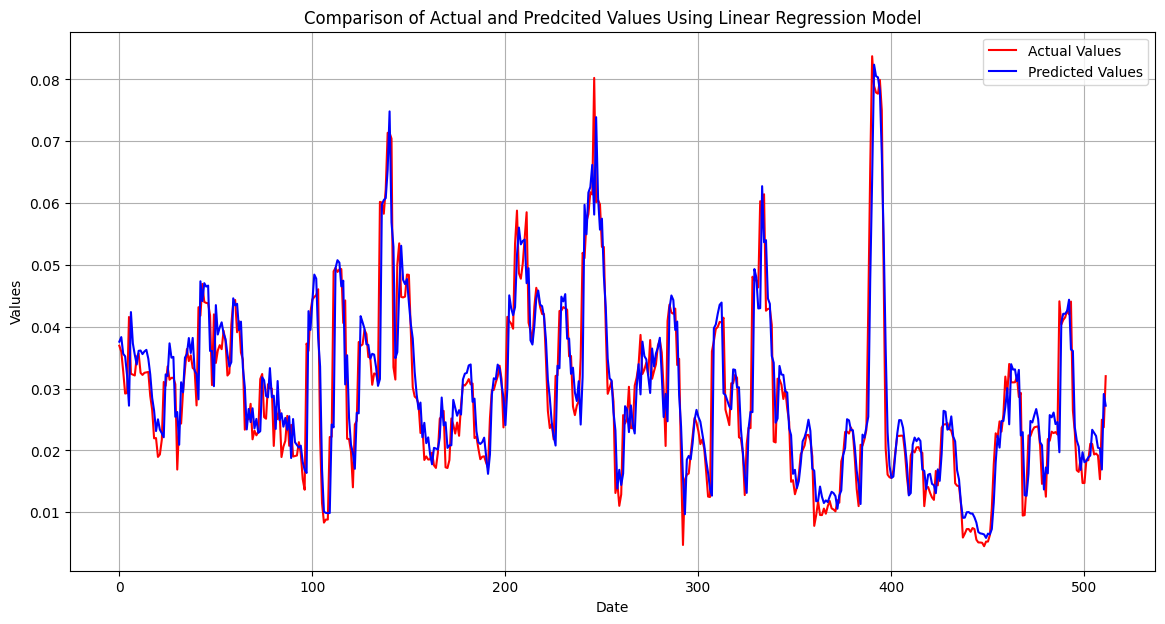

Root Mean Squared Error (RMSE): 0.005694496028891592
Mean Absolute Error (MAE): 0.0038802193533421223
Theil's U Statistic: 0.0877312122536093
Hit Rate: 0.5146771037181996


In [7]:
plt.figure(figsize=(14,7))

plt.plot(y_test, label='Actual Values', color='red')
plt.plot(y_pred, label='Predicted Values', color='blue')
plt.title("Comparison of Actual and Predcited Values Using Linear Regression Model")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.savefig("/Users/liqingyang/Documents/GitHub/variance_prediction/model_outputs_graphs/linear_regression.png", format='png', dpi=300)
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_ = np.sqrt(mean_squared_error(y_test, y_pred))
mae_ = mae(y_pred, y_test)
# print("MAPE:", mape(y_pred, y_test))
theils_u = theil_u_statistic(y_pred, y_test)

actual_changes = np.diff(y_test.flatten())
predicted_changes = np.diff(y_pred.flatten())
hit_rate = np.mean(np.sign(actual_changes) == np.sign(predicted_changes))

print("Root Mean Squared Error (RMSE):", rmse_)
print("Mean Absolute Error (MAE):", mae_)
print("Theil's U Statistic:", theils_u)
print("Hit Rate:", hit_rate)

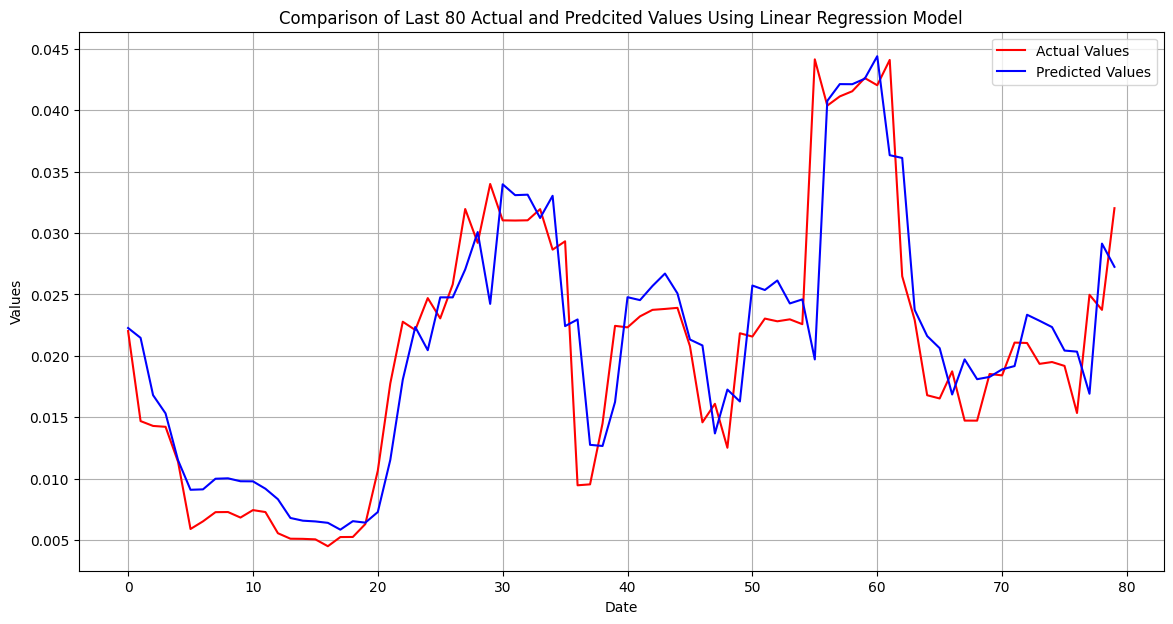

In [8]:
plt.figure(figsize=(14,7))

plt.plot(y_test[-80:], label='Actual Values', color='red')
plt.plot(y_pred[-80:], label='Predicted Values', color='blue')
plt.title("Comparison of Last 80 Actual and Predcited Values Using Linear Regression Model")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.savefig("/Users/liqingyang/Documents/GitHub/variance_prediction/model_outputs_graphs/linear_regression_last_80.png", format='png', dpi=300)

plt.show()

# from sklearn.metrics import mean_squared_error, mean_absolute_error
# # rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# rmse_ = np.sqrt(mean_squared_error(y_test, y_pred))
# mae_ = mae(y_pred, y_test)
# # print("MAPE:", mape(y_pred, y_test))
# theils_u = theil_u_statistic(y_pred, y_test)

# actual_changes = np.diff(y_test.flatten())
# predicted_changes = np.diff(y_pred.flatten())
# hit_rate = np.mean(np.sign(actual_changes) == np.sign(predicted_changes))

# print("Root Mean Squared Error (RMSE):", rmse_)
# print("Mean Absolute Error (MAE):", mae_)
# print("Theil's U Statistic:", theils_u)
# print("Hit Rate:", hit_rate)

### 4. Evaluation <a id='4'></a>

In [28]:
y_test

array([[0.03693496],
       [0.03597645],
       [0.03280325],
       [0.02920483],
       [0.02929156],
       [0.04158678],
       [0.03240583],
       [0.03226886],
       [0.03212977],
       [0.03514853],
       [0.03567072],
       [0.03254874],
       [0.03221632],
       [0.0325601 ],
       [0.03263246],
       [0.03269836],
       [0.02882684],
       [0.0265862 ],
       [0.02196807],
       [0.02200931],
       [0.01896196],
       [0.01935624],
       [0.02174031],
       [0.03108871],
       [0.03045309],
       [0.03359642],
       [0.03143933],
       [0.03174196],
       [0.0317621 ],
       [0.03070323],
       [0.01691523],
       [0.02445326],
       [0.02434487],
       [0.02956877],
       [0.03314343],
       [0.03640216],
       [0.03445148],
       [0.03539063],
       [0.03333889],
       [0.0330711 ],
       [0.02728628],
       [0.04316774],
       [0.04179517],
       [0.04692864],
       [0.04401441],
       [0.04386   ],
       [0.0438164 ],
       [0.041

In [29]:
print("RMSE:", rmse(y_pred, y_test))
print("MAE:", mae(y_pred, y_test))
print("MAPE:", mape(y_pred, y_test))
print("Theil U Statistic:", theil_u_statistic(y_pred, y_test))

RMSE: 0.0056880482336565535
MAE: 0.0038607286620316985
MAPE: 15.343836421592188
Theil U Statistic: 0.08774632959468241
